In [1]:
import pandas as pd

# Loading the Excel file
df = pd.read_excel("data/GlobalSuperstore1.xlsx")

# Checking the first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,6036,MX-2014-164812,2019-11-03,2019-11-07,Standard Class,BT-11530,Home Office,Tehuacán,Puebla,Mexico,...,OFF-FA-10001567,Office Supplies,Fasteners,"Advantus Paper Clips, Bulk Pack",18.76,2,0.0,7.8400,1.082,Medium
1,4189,US-2014-134075,2019-08-04,2019-08-08,Standard Class,LR-16915,Consumer,Coacalco,México,Mexico,...,OFF-AR-10004360,Office Supplies,Art,"Boston Pens, Fluorescent",30.96,3,0.0,11.7600,1.287,High
2,8925,MX-2012-106880,2017-06-22,2017-06-28,Standard Class,JL-15505,Consumer,Rivera,Rivera,Uruguay,...,OFF-SU-10001132,Office Supplies,Supplies,"Fiskars Trimmer, Serrated",52.00,2,0.0,16.1200,3.126,Medium
3,51224,RO-2014-1540,2019-04-18,2019-04-22,Standard Class,CV-2805,Corporate,Galati,Galati,Romania,...,FUR-OFF-10002740,Furniture,Chairs,"Office Star Steel Folding Chair, Set of Two",187.92,2,0.0,67.6200,30.280,High
4,37277,CA-2011-117765,2016-09-07,2016-09-13,Standard Class,RB-19465,Home Office,Tulsa,Oklahoma,United States,...,FUR-CH-10004698,Furniture,Chairs,"Padded Folding Chairs, Black, 4/Carton",161.96,2,0.0,45.3488,15.810,Medium


In [2]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [3]:
df.shape


(30454, 23)

In [4]:
df.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,30454.000000,30454,30454,6006.000000,30454.000000,30454.000000,30454.000000,30454.000000,30454.000000
mean,25745.675576,2018-05-11 18:39:53.064950528,2018-05-15 18:03:34.198463232,54838.481019,245.362609,3.473238,0.142921,27.691230,26.274576
min,1.000000,2016-01-01 00:00:00,2016-01-03 00:00:00,1453.000000,0.836000,1.000000,0.000000,-6599.978000,0.010000
25%,13006.250000,2017-06-18 00:00:00,2017-06-22 00:00:00,22229.000000,30.510000,2.000000,0.000000,0.000000,2.580000
50%,25785.500000,2018-07-08 00:00:00,2018-07-11 00:00:00,55407.000000,84.784000,3.000000,0.000000,9.180000,7.680000
75%,38562.750000,2019-05-22 00:00:00,2019-05-25 00:00:00,90004.000000,250.650000,5.000000,0.200000,36.852000,24.607500
max,51290.000000,2019-12-31 00:00:00,2020-01-07 00:00:00,99301.000000,17499.950000,14.000000,0.850000,8399.976000,933.570000
std,14794.125410,NaN,NaN,32070.055965,473.287166,2.278075,0.212271,173.899743,56.865594


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30454 entries, 0 to 30453
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          30454 non-null  int64         
 1   Order ID        30454 non-null  object        
 2   Order Date      30454 non-null  datetime64[ns]
 3   Ship Date       30454 non-null  datetime64[ns]
 4   Ship Mode       30454 non-null  object        
 5   Customer ID     30454 non-null  object        
 6   Segment         30454 non-null  object        
 7   City            30454 non-null  object        
 8   State           30454 non-null  object        
 9   Country         30454 non-null  object        
 10  Postal Code     6006 non-null   float64       
 11  Market          30454 non-null  object        
 12  Region          30454 non-null  object        
 13  Product ID      30454 non-null  object        
 14  Category        30454 non-null  object        
 15  Su

In [6]:
df.isnull().sum()


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Segment               0
City                  0
State                 0
Country               0
Postal Code       24448
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
# Droping Postal Code  not needed
df = df.drop(columns=['Postal Code'])

# Checking for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Ensuring Order Date and Ship Date are datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Quick look at cleaned data
df.info()


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30454 entries, 0 to 30453
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          30454 non-null  int64         
 1   Order ID        30454 non-null  object        
 2   Order Date      30454 non-null  datetime64[ns]
 3   Ship Date       30454 non-null  datetime64[ns]
 4   Ship Mode       30454 non-null  object        
 5   Customer ID     30454 non-null  object        
 6   Segment         30454 non-null  object        
 7   City            30454 non-null  object        
 8   State           30454 non-null  object        
 9   Country         30454 non-null  object        
 10  Market          30454 non-null  object        
 11  Region          30454 non-null  object        
 12  Product ID      30454 non-null  object        
 13  Category        30454 non-null  object        
 14  Sub-Category    30454 non-

Category
Technology         2.802347e+06
Furniture          2.434043e+06
Office Supplies    2.235883e+06
Name: Sales, dtype: float64


/var/folders/v8/0rk7b40d0j9fv4294qqkpcrh0000gn/T/ipykernel_24615/4176847924.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


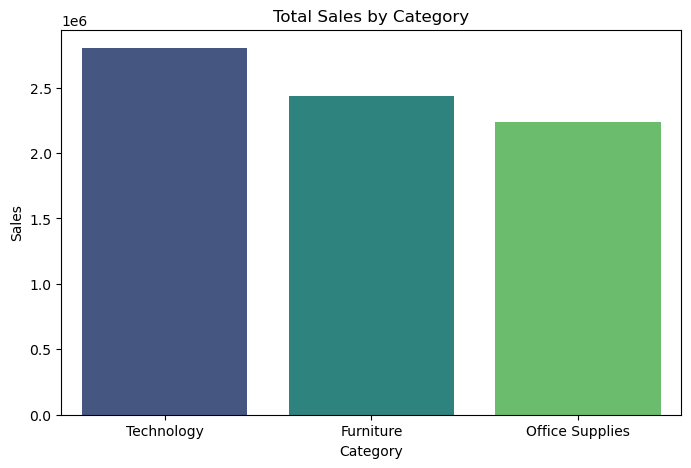

Region
Central           180432.97552
North             110722.88632
North Asia         97329.07200
South              89842.58704
Central Asia       69238.38700
Oceania            69104.15100
West               62277.15280
East               50468.98820
Africa             45802.08600
EMEA               24539.27400
Caribbean          20993.43444
Southeast Asia     12652.61820
Canada              9905.10000
Name: Profit, dtype: float64


/var/folders/v8/0rk7b40d0j9fv4294qqkpcrh0000gn/T/ipykernel_24615/4176847924.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='magma')


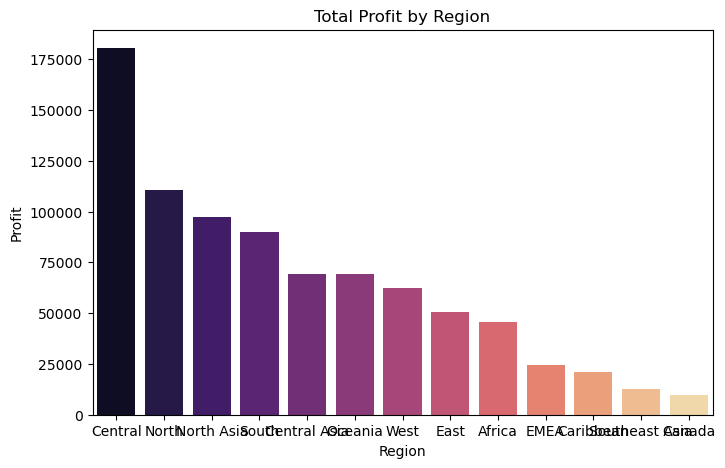

Product Name
Nokia Smart Phone, Full Size                  49540.9315
Motorola Smart Phone, Full Size               49401.5590
Apple Smart Phone, Full Size                  44173.7420
Cisco Smart Phone, Full Size                  38016.1120
Hon Executive Leather Armchair, Adjustable    37108.4497
Canon imageCLASS 2200 Advanced Copier         36399.8960
Motorola Smart Phone, Cordless                32696.0760
Novimex Executive Leather Armchair, Red       30960.7220
Samsung Smart Phone, VoIP                     30624.3520
Nokia Smart Phone, with Caller ID             30424.8942
Name: Sales, dtype: float64


/var/folders/v8/0rk7b40d0j9fv4294qqkpcrh0000gn/T/ipykernel_24615/4176847924.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='coolwarm')


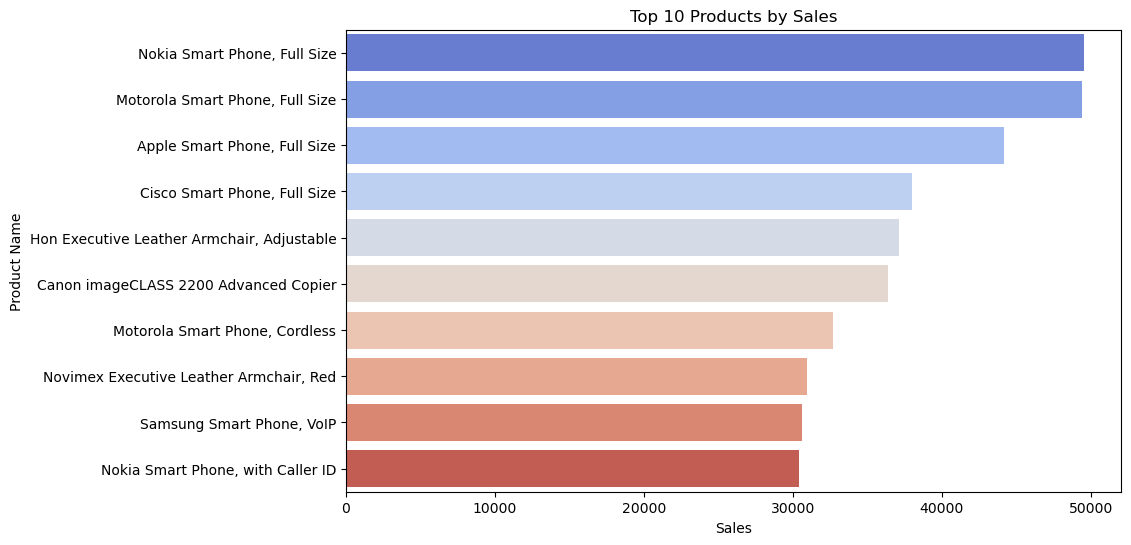

In [3]:
#EDA(Exploratory Data Analysis) 
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()

# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print(region_profit)

plt.figure(figsize=(8,5))
sns.barplot(x=region_profit.index, y=region_profit.values, palette='magma')
plt.title('Total Profit by Region')
plt.ylabel('Profit')
plt.show()

# Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

plt.figure(figsize=(10,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.show()


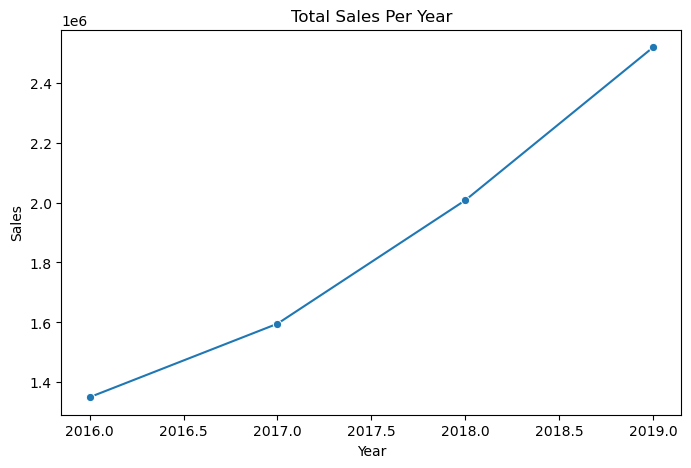

In [4]:
#Time Series Analysis – Sales Over Time
# Extracting year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Total sales per year
sales_per_year = df.groupby('Year')['Sales'].sum()

# Plot sales per year
plt.figure(figsize=(8,5))
sns.lineplot(x=sales_per_year.index, y=sales_per_year.values, marker='o')
plt.title('Total Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


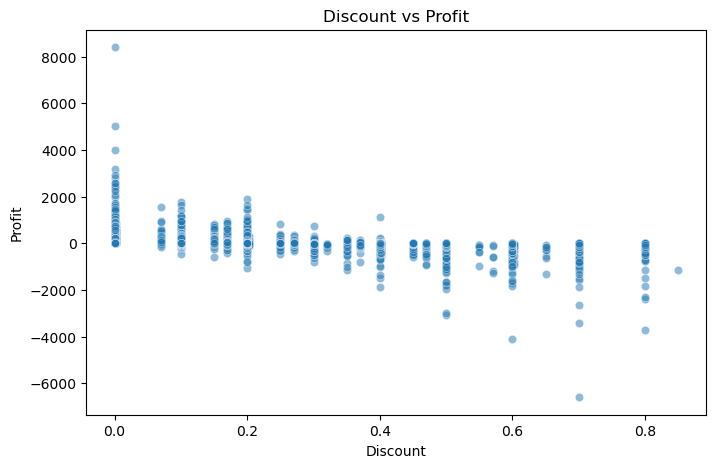

In [5]:
#Discount vs Profit Analysis
# Scatter plot of Discount vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


/var/folders/v8/0rk7b40d0j9fv4294qqkpcrh0000gn/T/ipykernel_24615/1428038186.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_discount = df.groupby('Discount_bin')['Profit'].mean()


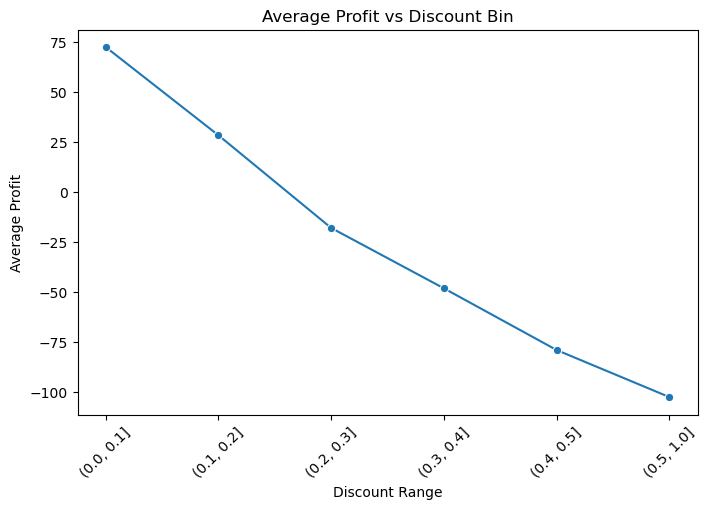

In [6]:
# Create discount bins
df['Discount_bin'] = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0])

# Average profit per discount bin
profit_by_discount = df.groupby('Discount_bin')['Profit'].mean()

# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(x=profit_by_discount.index.astype(str), y=profit_by_discount.values, marker='o')
plt.title('Average Profit vs Discount Bin')
plt.xlabel('Discount Range')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()


/var/folders/v8/0rk7b40d0j9fv4294qqkpcrh0000gn/T/ipykernel_24615/650594832.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_orders.index, y=shipping_orders.values, palette='pastel')


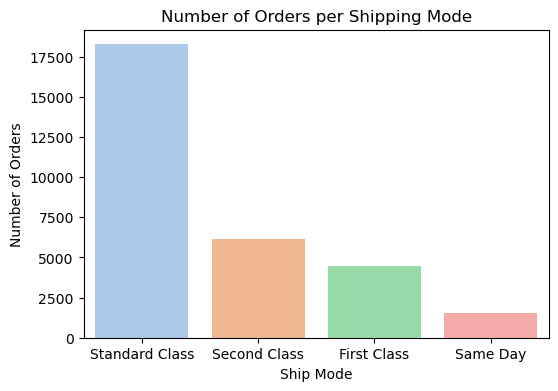

/var/folders/v8/0rk7b40d0j9fv4294qqkpcrh0000gn/T/ipykernel_24615/650594832.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_profit.index, y=shipping_profit.values, palette='Set2')


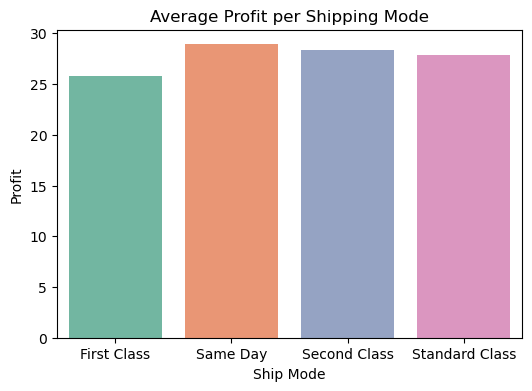

In [7]:
# Total orders per shipping mode
shipping_orders = df['Ship Mode'].value_counts()

# Average profit per shipping mode
shipping_profit = df.groupby('Ship Mode')['Profit'].mean()

# Plot orders
plt.figure(figsize=(6,4))
sns.barplot(x=shipping_orders.index, y=shipping_orders.values, palette='pastel')
plt.title('Number of Orders per Shipping Mode')
plt.ylabel('Number of Orders')
plt.show()

# Plot average profit
plt.figure(figsize=(6,4))
sns.barplot(x=shipping_profit.index, y=shipping_profit.values, palette='Set2')
plt.title('Average Profit per Shipping Mode')
plt.ylabel('Profit')
plt.show()

